**Title: TRIP BY DISTANCE IN US (2019-2023)**

This notebook shows how dataset was transformed in 8 methods. The best method is Resampling weekly, log and differencing & was not shown here. You can find in the final notebook Population Movement_Final

In [64]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('Trips_by_Distance.csv')

In [66]:
df.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019/01/01,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,2019/01/02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,2019/01/03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,2019/01/04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,2019/01/05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158310 entries, 0 to 5158309
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Level                           object 
 1   Date                            object 
 2   State FIPS                      float64
 3   State Postal Code               object 
 4   County FIPS                     float64
 5   County Name                     object 
 6   Population Staying at Home      float64
 7   Population Not Staying at Home  float64
 8   Number of Trips                 float64
 9   Number of Trips <1              float64
 10  Number of Trips 1-3             float64
 11  Number of Trips 3-5             float64
 12  Number of Trips 5-10            float64
 13  Number of Trips 10-25           float64
 14  Number of Trips 25-50           float64
 15  Number of Trips 50-100          float64
 16  Number of Trips 100-250         float64
 17  Number of Trips 250-500    

About the data:
1. The data is sorted according to national level and county level. 
2. For National level, column for state and county is missing. It is sorted daily info (1/1/2019 - 5/6/2021)
3. For State level, column for county is missing. It is sorted Date>>State>>data. Sorted daily (1/1/2019 -5/6/2021) 
3. For County level, the data is sorted according to Month>>week>>date>>state>>county>>the rest of data

1/1/2019,Month 1, week 1, , Wyoming, Sublette County, then the data.
The data is updated daily for each county

In [68]:
# Ensure the index is a DateTimeIndex and sort it
df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()


,Level,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,National,NaN,NaN,NaN,NaN,77433867.0,248733553.0,897784368.0,241667151.0,234284795.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
2019-01-01,County,21.0,KY,21187.0,Owen County,2186.0,8715.0,31075.0,4994.0,7563.0,...,4914.0,6050.0,1949.0,876.0,378.0,117.0,34.0,21-21187-20190101,0,1
2019-01-01,County,21.0,KY,21185.0,Oldham County,14156.0,52643.0,175728.0,33711.0,47731.0,...,28168.0,32113.0,11257.0,2773.0,1201.0,423.0,669.0,21-21185-20190101,0,1
2019-01-01,County,21.0,KY,21183.0,Ohio County,4322.0,19672.0,81631.0,17250.0,19266.0,...,13198.0,12575.0,7698.0,1396.0,760.0,84.0,11.0,21-21183-20190101,0,1
2019-01-01,County,21.0,KY,21181.0,Nicholas County,1307.0,5962.0,21732.0,5027.0,6833.0,...,2678.0,2768.0,1613.0,278.0,124.0,19.0,8.0,21-21181-20190101,0,1


In [14]:
# Filter the DataFrame for rows where the 'County Name' is "Cook County" and 'State Postal Code' is "IL"
df_filtered = df[(df['County Name'] == "Cook County") & (df['State Postal Code'] == "IL")]

# Ensure the DataFrame is sorted by date
ts = df_filtered.sort_index()
ts.dropna(inplace=True)
ts

,Level,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,County,17.0,IL,17031.0,Cook County,1396803.0,3753430.0,15198911.0,4832245.0,3703206.0,...,2048283.0,1967193.0,611265.0,120727.0,110623.0,33141.0,30570.0,17-17031-20190101,0,1
2019-01-02,County,17.0,IL,17031.0,Cook County,1113847.0,4036386.0,19223606.0,5761425.0,4581022.0,...,2793768.0,2764012.0,748106.0,120925.0,113753.0,33345.0,27671.0,17-17031-20190102,0,1
2019-01-03,County,17.0,IL,17031.0,Cook County,1130134.0,4020099.0,19640570.0,5829954.0,4728760.0,...,2943410.0,2765745.0,735533.0,119774.0,117008.0,36312.0,29032.0,17-17031-20190103,0,1
2019-01-04,County,17.0,IL,17031.0,Cook County,1100928.0,4049305.0,19961918.0,5853756.0,4783166.0,...,3045365.0,2823805.0,734956.0,120149.0,122384.0,35505.0,29028.0,17-17031-20190104,0,1
2019-01-05,County,17.0,IL,17031.0,Cook County,1141428.0,4008805.0,20239858.0,6050570.0,5054838.0,...,2995651.0,2639569.0,704066.0,131182.0,120787.0,34039.0,25696.0,17-17031-20190105,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30,County,17.0,IL,17031.0,Cook County,1250966.0,3899267.0,22184466.0,7035087.0,5176570.0,...,3209232.0,3008281.0,811732.0,165912.0,127363.0,51025.0,42472.0,17-17031-20230530,22,5
2023-05-31,County,17.0,IL,17031.0,Cook County,1228426.0,3921807.0,23234620.0,7448921.0,5371499.0,...,3334428.0,3120153.0,864738.0,183799.0,136313.0,52986.0,42388.0,17-17031-20230531,22,5
2023-06-01,County,17.0,IL,17031.0,Cook County,1221557.0,3928676.0,21515079.0,6956277.0,5076889.0,...,3035039.0,2765178.0,784921.0,183629.0,143780.0,53137.0,43835.0,17-17031-20230601,22,6


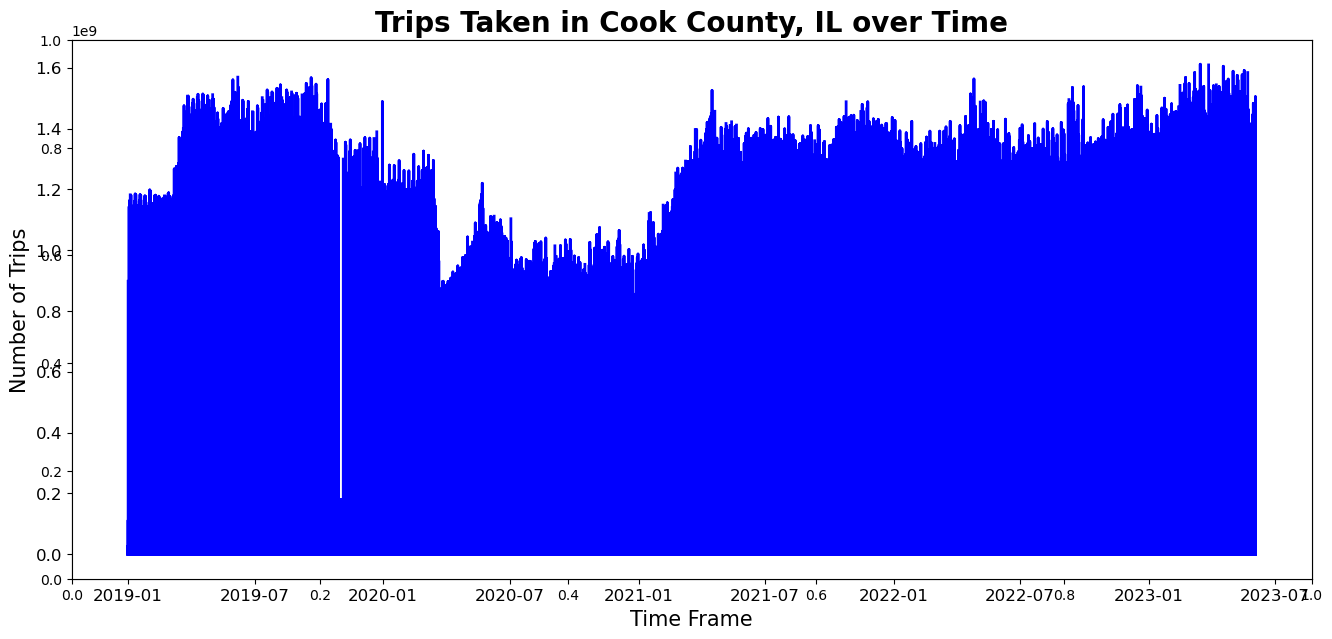

In [69]:
# Plot No of trips in Cook County, IL over time
plt.figure(figsize=(16, 7))
plt.title('Trips Taken in Cook County, IL over Time', fontsize=20, fontweight='bold')
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame', fontsize=15)
ax1.set_ylabel('Number of Trips', fontsize=15)
ax1.plot(df['Number of Trips'], color='b', linestyle='-', linewidth=2)
ax1.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [70]:
# Filter the DataFrame for rows where the 'County Name' is "Cook County" and 'State Postal Code' is "IL"
df_filtered = df[(df['County Name'] == "Cook County") & (df['State Postal Code'] == "IL")]

# Ensure the DataFrame is sorted by date
df_filtered = df_filtered.sort_index()
# Create the time series from the 'Number of Trips' column
ts = df_filtered['Number of Trips']
ts

Date
2019-01-01    15198911.0
2019-01-02    19223606.0
2019-01-03    19640570.0
2019-01-04    19961918.0
2019-01-05    20239858.0
                 ...    
2023-05-30    22184466.0
2023-05-31    23234620.0
2023-06-01    21515079.0
2023-06-02    23068149.0
2023-06-03    24016989.0
Name: Number of Trips, Length: 1615, dtype: float64

In [74]:
# Overwrite df.
df = ts.resample('W').mean()
df.head()

Date
2019-01-06    1.873133e+07
2019-01-13    1.924244e+07
2019-01-20    1.934667e+07
2019-01-27    1.907268e+07
2019-02-03    1.875349e+07
Freq: W-SUN, Name: Number of Trips, dtype: float64

In [75]:
# Perform Augmented Dickey-Fuller (ADF) test, to check stationarity.
# ADF Test - null hypothesis - data is non-stationary 
# if p-value < 5% reject null hypothesis
# Result: p-value > 5%, data is not stationary

adfuller_result = adfuller(ts, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.233784277700868
p-value: 0.19421294281671775
Critial Values:
   1%, -3.434461656404719
Critial Values:
   5%, -2.863356053770622
Critial Values:
   10%, -2.567736831977157


DIFFERENCING TO REMOVE TREND

In [77]:
diff_ts=df.diff()

<Axes: xlabel='Date'>

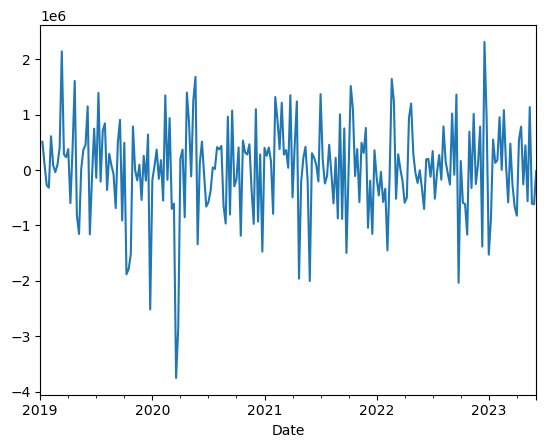

In [78]:
diff_ts.plot()

In [79]:
adf1=adfuller(diff_ts.dropna())
print('pvalue of ADF test is :', adf1[1])    #ADF proved data is now stationary after removing the trend

pvalue of ADF test is : 4.029117386409935e-28


In [80]:
diff2_ts=diff_ts.diff().diff()

In [81]:
adf1=adfuller(df2.dropna())
print('pvalue of ADF test is :', adf1[1])

pvalue of ADF test is : 3.4938538921601032e-09


 LOG METHOD

In [82]:
log_df=np.log(ts)
log_df.head()

Date
2019-01-01    16.536734
2019-01-02    16.771650
2019-01-03    16.793108
2019-01-04    16.809337
2019-01-05    16.823164
Name: Number of Trips, dtype: float64

In [83]:
adf1=adfuller(log_df.dropna())
print('pvalue of ADF test is :', adf1[1])    #ADF probability for log Trip


pvalue of ADF test is : 0.1581996589973962


SQRT METHOD

In [84]:
sqrt_df = np.sqrt(ts)
sqrt_df

Date
2019-01-01    3898.578074
2019-01-02    4384.473286
2019-01-03    4431.768270
2019-01-04    4467.876229
2019-01-05    4498.872970
                 ...     
2023-05-30    4710.038853
2023-05-31    4820.230285
2023-06-01    4638.434973
2023-06-02    4802.931292
2023-06-03    4900.713111
Name: Number of Trips, Length: 1615, dtype: float64

In [85]:
adf1=adfuller(sqrt_df.dropna())
print('pvalue of ADF test is :', adf1[1])    #ADF probability for SQRT


pvalue of ADF test is : 0.17791268035806806


CUBEROOT METHOD

In [86]:
cbrt_df = np.cbrt(ts)
cbrt_df

Date
2019-01-01    247.706550
2019-01-02    267.882876
2019-01-03    269.805850
2019-01-04    271.269368
2019-01-05    272.522577
                 ...    
2023-05-30    280.984907
2023-05-31    285.350426
2023-06-01    278.129880
2023-06-02    284.667300
2023-06-03    288.517960
Name: Number of Trips, Length: 1615, dtype: float64

In [87]:
adf1=adfuller(cbrt_df.dropna())
print('pvalue of ADF test is :', adf1[1])    #ADF probability for CBRT


pvalue of ADF test is : 0.1716702507596093


LOG AND SQRT METHOD

In [88]:
log_sqrt_df=np.sqrt(log_df)
log_sqrt_df

Date
2019-01-01    4.066538
2019-01-02    4.095320
2019-01-03    4.097939
2019-01-04    4.099919
2019-01-05    4.101605
                ...   
2023-05-30    4.112773
2023-05-31    4.118392
2023-06-01    4.109047
2023-06-02    4.117519
2023-06-03    4.122411
Name: Number of Trips, Length: 1615, dtype: float64

In [89]:
adf1=adfuller(log_sqrt_df.dropna())
print('pvalue of ADF test is :', adf1[1])    #ADF probability for Log SQRT


pvalue of ADF test is : 0.1569334258218124


LOG & CBRT

In [90]:
log_cbrt_df=np.cbrt(log_df)
log_cbrt_df

Date
2019-01-01    2.547710
2019-01-02    2.559717
2019-01-03    2.560808
2019-01-04    2.561633
2019-01-05    2.562335
                ...   
2023-05-30    2.566984
2023-05-31    2.569322
2023-06-01    2.565433
2023-06-02    2.568958
2023-06-03    2.570993
Name: Number of Trips, Length: 1615, dtype: float64

In [91]:
adf1=adfuller(log_cbrt_df.dropna())
print('pvalue of ADF test is :', adf1[1])    #ADF probability for Log CBRT


pvalue of ADF test is : 0.15650959844142892
